In [7]:
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float 
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func
import pymysql
pymysql.install_as_MySQLdb()
import numpy as np
import matplotlib.pyplot as plt

In [8]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [9]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [10]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [11]:
session = Session(engine)

In [12]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [13]:
year_rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp != "None").\
    filter(Measurement.date >= year_ago).all()
print(year_rain)

[('2016-08-23', 0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0), ('2016-08-27', 0), ('2016-08-28', 0.01), ('2016-08-29', 0), ('2016-08-30', 0), ('2016-08-31', 0.13), ('2016-09-01', 0), ('2016-09-02', 0), ('2016-09-03', 0), ('2016-09-04', 0.03), ('2016-09-07', 0.05), ('2016-09-08', 0), ('2016-09-09', 0.03), ('2016-09-10', 0), ('2016-09-11', 0.05), ('2016-09-12', 0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0), ('2016-09-19', 0), ('2016-09-20', 0), ('2016-09-21', 0), ('2016-09-22', 0.02), ('2016-09-23', 0), ('2016-09-24', 0), ('2016-09-25', 0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0), ('2016-09-29', 0), ('2016-09-30', 0), ('2016-10-01', 0), ('2016-10-02', 0), ('2016-10-03', 0), ('2016-10-04', 0), ('2016-10-05', 0), ('2016-10-06', 0), ('2016-10-07', 0), ('2016-10-08', 0), ('2016-10-09', 0), ('2016-10-10', 0), ('2016-10-11', 0), ('2016-10-12', 0), ('2016-10-13', 0), (

In [15]:
rain_df = pd.DataFrame(year_rain, columns = ["Date", "Precipitation"])
rain_df["Date"] = pd.to_datetime(rain_df["Date"], format="%Y-%m-%d")
rain_df.set_index("Date", inplace=True)
rain_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


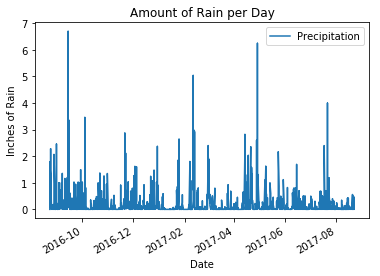

In [65]:
rain_df.plot(kind='line')
plt.title("Amount of Rain per Day")
plt.ylabel("Inches of Rain")
plt.show()

In [17]:
total_stations = len(session.query(Station.station).all())
print(f"There are {total_stations} stations.")

There are 9 stations.


In [18]:
highest_obv = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(highest_obv)
print("---")
print(f"The station with the most observations was {highest_obv[0][0]}.")

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
---
The station with the most observations was USC00519281.


In [19]:
year_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.tobs != "None").\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == highest_obv[0][0]).all()
print(year_tobs)

[('2016-08-23', 77), ('2016-08-24', 77), ('2016-08-25', 80), ('2016-08-26', 80), ('2016-08-27', 75), ('2016-08-28', 73), ('2016-08-29', 78), ('2016-08-30', 77), ('2016-08-31', 78), ('2016-09-01', 80), ('2016-09-02', 80), ('2016-09-03', 78), ('2016-09-04', 78), ('2016-09-05', 78), ('2016-09-06', 73), ('2016-09-07', 74), ('2016-09-08', 80), ('2016-09-09', 79), ('2016-09-10', 77), ('2016-09-11', 80), ('2016-09-12', 76), ('2016-09-13', 79), ('2016-09-14', 75), ('2016-09-15', 79), ('2016-09-16', 78), ('2016-09-17', 79), ('2016-09-18', 78), ('2016-09-19', 78), ('2016-09-20', 76), ('2016-09-21', 74), ('2016-09-22', 77), ('2016-09-23', 78), ('2016-09-24', 79), ('2016-09-25', 79), ('2016-09-26', 77), ('2016-09-27', 80), ('2016-09-28', 78), ('2016-09-29', 78), ('2016-09-30', 78), ('2016-10-01', 77), ('2016-10-02', 79), ('2016-10-03', 79), ('2016-10-04', 79), ('2016-10-05', 79), ('2016-10-06', 75), ('2016-10-07', 76), ('2016-10-08', 73), ('2016-10-09', 72), ('2016-10-10', 71), ('2016-10-11', 77),

In [20]:
tobs_df = pd.DataFrame(year_tobs, columns = ["Date", "Temperature"])
tobs_df.set_index("Date", inplace=True)
tobs_df.head()

,Temperature
Date,
2016-08-23,77
2016-08-24,77
2016-08-25,80
2016-08-26,80
2016-08-27,75


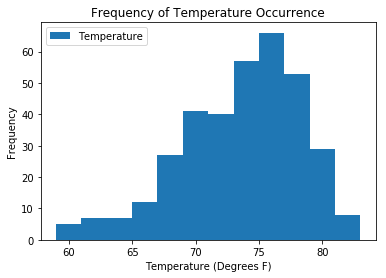

In [66]:
tobs_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature (Degrees F)")
plt.title("Frequency of Temperature Occurrence")
plt.show()

In [22]:
def calc_temps(start_date, end_date):    
    date_range = session.query(Measurement.tobs).\
        filter(Measurement.tobs != "None").\
        filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
    
    minimum = np.ravel(date_range).min()
    maximum = np.ravel(date_range).max()
    average = round(np.ravel(date_range).mean(),2)
    return(f"Minimum temperature: {minimum}. Maximum temperature: {maximum}. Average temperature: {average}")

In [23]:
calc_temps("2016-07-24", "2016-08-03")

'Minimum temperature: 72. Maximum temperature: 83. Average temperature: 77.94'

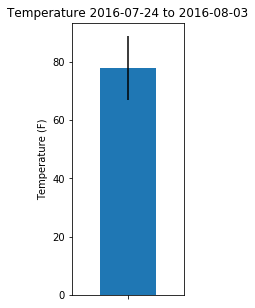

In [24]:
plt.figure(figsize = (2,5))

tmax = 83
tmin = 72
tavg = 77.94

plt.bar("", tavg, yerr=(tmax-tmin), width=0.2)
plt.ylabel("Temperature (F)")
plt.title("Temperature 2016-07-24 to 2016-08-03")
plt.xlim(-.2, .2)
plt.show()